<a href="https://colab.research.google.com/github/mesuttguven/Denoising-Autoencoders/blob/main/Using_DAE_for_Detecting_Obfuscated_Malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MALWARE as IMAGES by Using Transfer Learning

# Imports


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import numpy as np
import PIL.Image as Image
import random
import shutil
import zipfile


In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [ ]:
import matplotlib.pylab as plt

import tensorflow_hub as hub
#import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Part 1:** Unzip Data & Obfuscate the benign samples, then Converting PEs (.exe) to RGB Format (Images)

## **Part 1.1:** PEs Dataset

In [ ]:
# 1. ML4CS CookBook DATA (PEs) EXTRACTION INTO "/benign_exe" and "/malicious_exe" FOLDERS

!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Benign PE Samples 1.7z" -o"/content/benign_exe"
!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Benign PE Samples 2.7z" -o"/content/benign_exe"
!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Benign PE Samples 3.7z" -o"/content/benign_exe"
!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Benign PE Samples 4.7z" -o"/content/benign_exe"

# specify the directory to delete directories from
dir_path = "/content/benign_exe"
# get a list of all directories inside the directory
dir_list = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
# loop through the directories and delete them (including non-empty ones)
for d in dir_list:
    dir_to_delete = os.path.join(dir_path, d)
    shutil.rmtree(dir_to_delete)



!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Malicious PE Samples 1.7z" -o"/content/malicious_exe" -p'infected'
!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Malicious PE Samples 2.7z" -o"/content/malicious_exe" -p'infected'

# specify the directory to delete directories from
dir_path = "/content/malicious_exe"
# get a list of all directories inside the directory
dir_list = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
# loop through the directories and delete them (including non-empty ones)
for d in dir_list:
    dir_to_delete = os.path.join(dir_path, d)
    shutil.rmtree(dir_to_delete)





7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Drive_Me . E/4_ML for MALWARE/DATASETS/PEs/                                                                            1 file, 7042718 bytes (6878 KiB)

Extracting archive: /content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Benign PE Samples 1.7z
--
Path = /content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/PEs/Benign PE Samples 1.7z
Type = 7z
Physical Size = 7042718
Headers Size = 1938
Method = LZMA2:24 BCJ
Solid = +
Blocks = 1

  0%     34% 5 - Benign PE Samples 1/Hx

## **Part 1.2:** Trapmine Dataset

### Unzip,  and Load. Be careful NOT to save Malware Files

In [ ]:
# 2. TRAPMINE DATA EXTRACTION INTO "/benign_exe" and "/malicious_exe" FOLDERS

!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/ml-data-benign.zip" -o"/content/benign_exe" -p'benign'

# specify the directory to delete directories from
dir_path = "/content/benign_exe"
# get a list of all directories inside the directory
dir_list = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
# loop through the directories and delete them (including non-empty ones)
for d in dir_list:
    dir_to_delete = os.path.join(dir_path, d)
    shutil.rmtree(dir_to_delete)

!7z e "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/ml-data-malicious.zip" -o"/content/malicious_exe" -p'infected'

# specify the directory to delete directories from
dir_path = "/content/malicious_exe"
# get a list of all directories inside the directory
dir_list = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
# loop through the directories and delete them (including non-empty ones)
for d in dir_list:
    dir_to_delete = os.path.join(dir_path, d)
    shutil.rmtree(dir_to_delete)


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Drive_Mesu . ML for MALWARE/DATASETS/TRAPMINE/                                                                               1 file, 3597056781 bytes (3431 MiB)

Extracting archive: /content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/ml-data-benign.zip
 40% 4096 Open              --
Path = /content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/ml-data-benign.zip
Type = zip
Physical Size = 3597056781

  0%      0% 13 - ml-data

In [ ]:
import os

# Directory paths
benign_folder = "/content/benign_exe"
malicious_folder = "/content/malicious_exe"

# Counting samples in benign folder
benign_samples = len(os.listdir(benign_folder))

# Counting samples in malicious folder
malicious_samples = len(os.listdir(malicious_folder))

# Print the counts
print(f"Number of benign samples: {benign_samples}")
print(f"Number of malicious samples: {malicious_samples}")


Number of benign samples: 10217
Number of malicious samples: 7000


In [ ]:
#!cp -r /content/benign_exe "/content/drive/MyDrive/Drive_IEEE/PAPER/4_ML for MALWARE/DATASETS/TRAPMINE/benign_exe"

##**PART 1.3:** Obfuscating the benign samples

In [ ]:
import os
import shutil
import random
import zlib  # Add this line to import zlib module

# Function to simulate code packing technique
def apply_code_packing(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        # Simulate code packing by compressing and encrypting the file
        with open(source_path, 'rb') as source_file:
            original_data = source_file.read()

        # Implement compression and encryption here (placeholder example)
        compressed_data = zlib.compress(original_data)  # Example compression

        # Write modified data to target file
        with open(target_path, 'wb') as target_file:
            target_file.write(compressed_data)

# Function to simulate encryption technique
def apply_encryption(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        # Simulate encryption by encrypting the file contents
        with open(source_path, 'rb') as source_file:
            original_data = source_file.read()

        # Implement encryption algorithm here (placeholder example)
        encrypted_data = bytearray()
        for byte in original_data:
            encrypted_data.append(byte ^ 0xFF)  # Example XOR encryption

        # Write modified data to target file
        with open(target_path, 'wb') as target_file:
            target_file.write(encrypted_data)

# Function to simulate file header modification technique
def apply_file_header_modification(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        # Simulate file header modification by altering file headers
        with open(source_path, 'rb') as source_file:
            original_data = bytearray(source_file.read())

        # Modify file header bytes (placeholder example)
        header_size = 128  # Example: Modify first 128 bytes as header
        modified_data = original_data[:header_size] + bytes([0xFF] * (len(original_data) - header_size))

        # Write modified data to target file
        with open(target_path, 'wb') as target_file:
            target_file.write(modified_data)

# Function to simulate control flow obfuscation technique
def apply_control_flow_obfuscation(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        # Simulate control flow obfuscation by modifying program logic
        with open(source_path, 'rb') as source_file:
            original_data = bytearray(source_file.read())

        # Implement control flow obfuscation (placeholder example)
        for i in range(0, len(original_data), 4):
            original_data[i] ^= 0xFF  # Example: XOR every 4th byte

        # Write modified data to target file
        with open(target_path, 'wb') as target_file:
            target_file.write(original_data)

# Function to simulate data obfuscation technique
def apply_data_obfuscation(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        # Simulate data obfuscation by modifying data sections
        with open(source_path, 'rb') as source_file:
            original_data = bytearray(source_file.read())

        # Implement data obfuscation (placeholder example)
        for i in range(len(original_data)):
            original_data[i] = (original_data[i] + 1) % 256  # Example: Increment each byte

        # Write modified data to target file
        with open(target_path, 'wb') as target_file:
            target_file.write(original_data)

# Function to simulate string obfuscation technique
def apply_string_obfuscation(source_folder, target_folder):
    for file_name in os.listdir(source_folder):
        source_path = os.path.join(source_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        # Simulate string obfuscation by encrypting or encoding strings
        with open(source_path, 'rb') as source_file:
            original_data = bytearray(source_file.read())

        # Implement string obfuscation (placeholder example)
        string_offset = 512  # Example: Modify strings starting from byte offset 512
        while string_offset < len(original_data):
            original_data[string_offset] ^= 0xFF  # Example: XOR encryption for strings
            string_offset += 32  # Move to next string (assuming strings are 32 bytes apart)

        # Write modified data to target file
        with open(target_path, 'wb') as target_file:
            target_file.write(original_data)

# Function to apply all obfuscation techniques sequentially
def apply_all_obfuscations(source_folder, base_target_folder):
    techniques = [
        ("Code_Packing", apply_code_packing),
        ("Encryption", apply_encryption),
        ("File_Header_Modification", apply_file_header_modification),
        ("Control_Flow_Obfuscation", apply_control_flow_obfuscation),
        ("Data_Obfuscation", apply_data_obfuscation),
        ("String_Obfuscation", apply_string_obfuscation)
    ]

    for name, technique in techniques:
        target_folder = os.path.join(base_target_folder, name)
        os.makedirs(target_folder, exist_ok=True)
        technique(source_folder, target_folder)

# Example usage:
benign_source = "/content/benign_exe"
obfuscated_base_target = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign"

# Apply all obfuscation techniques to benign samples
apply_all_obfuscations(benign_source, obfuscated_base_target)


In [ ]:
import os

obfuscated_base_target = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign"

# Function to count files in each subfolder
def count_files_in_subfolders(base_folder):
    subfolders = [f.path for f in os.scandir(base_folder) if f.is_dir()]
    for folder in subfolders:
        folder_name = os.path.basename(folder)
        files_count = len(os.listdir(folder))
        print(f"Folder '{folder_name}' contains {files_count} files.")

# Example usage:
count_files_in_subfolders(obfuscated_base_target)


Folder 'Code_Packing' contains 10217 files.
Folder 'Encryption' contains 10217 files.
Folder 'File_Header_Modification' contains 10217 files.
Folder 'Control_Flow_Obfuscation' contains 10217 files.
Folder 'Data_Obfuscation' contains 10217 files.
Folder 'String_Obfuscation' contains 10217 files.


In [ ]:
import shutil

#target_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images"

try:
    #shutil.rmtree(target_folder)
    print(f"Deleted {target_folder} and its contents successfully.")
except Exception as e:
    print(f"Failed to delete {target_folder}: {e}")


Deleted /content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images and its contents successfully.


## **Part 1.4 RGB** Conversion Functions

In [ ]:
from PIL import Image
import os
import numpy as np

def rgb_image_convert(source_folder, target_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        target_path = os.path.join(target_folder, filename)

        try:
            # Read data from file
            with open(source_path, 'rb') as source_file:
                binary = bytearray(source_file.read())

            # Example RGB conversion logic (replace with actual conversion)
            ind = 0
            rgb_im = []
            while (ind + 2) < len(binary):
                R = binary[ind]
                G = binary[ind + 1]
                B = binary[ind + 2]
                ind += 3
                rgb_im.append((R, G, B))

            # Create PIL image
            width = int(np.sqrt(len(rgb_im))) + 1
            height = width
            image = Image.new('RGB', (width, height))
            image.putdata(rgb_im)

            # Create target folder if it doesn't exist
            os.makedirs(target_folder, exist_ok=True)

            # Save image
            image.save(target_path + ".png")
            print(f"Saved RGB image for {filename}")

        except Exception as e:
            print(f"Error converting {filename}: {str(e)}")

def convert_all_techniques(base_folder, output_base_folder):
    techniques = ["Code_Packing", "Encryption", "File_Header_Modification", "Control_Flow_Obfuscation", "Data_Obfuscation", "String_Obfuscation"]

    for technique in techniques:
        source_folder = os.path.join(base_folder, technique)
        target_folder = os.path.join(output_base_folder, technique + "_images")

        rgb_image_convert(source_folder, target_folder)

# Example usage:
obfuscated_base_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign"
output_base_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images"

convert_all_techniques(obfuscated_base_folder, output_base_folder)


### How many images we have?

In [ ]:
import os

# Base folder where images are saved
base_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images"

# List of obfuscation techniques (sub-folders)
techniques = ["Code_Packing_images", "Encryption_images", "File_Header_Modification_images",
              "Control_Flow_Obfuscation_images", "Data_Obfuscation_images", "String_Obfuscation_images"]

# Function to count files in each sub-folder
def count_files_in_subfolders(base_folder):
    for technique in techniques:
        technique_folder = os.path.join(base_folder, technique)
        files_count = len(os.listdir(technique_folder))
        print(f"Folder '{technique}' contains {files_count} images.")

# Example usage:
count_files_in_subfolders(base_folder)


Folder 'Code_Packing_images' contains 10217 images.
Folder 'Encryption_images' contains 10217 images.
Folder 'File_Header_Modification_images' contains 10217 images.
Folder 'Control_Flow_Obfuscation_images' contains 10217 images.
Folder 'Data_Obfuscation_images' contains 10217 images.
Folder 'String_Obfuscation_images' contains 10217 images.


### Plotting Original Images and Obfuscated versions

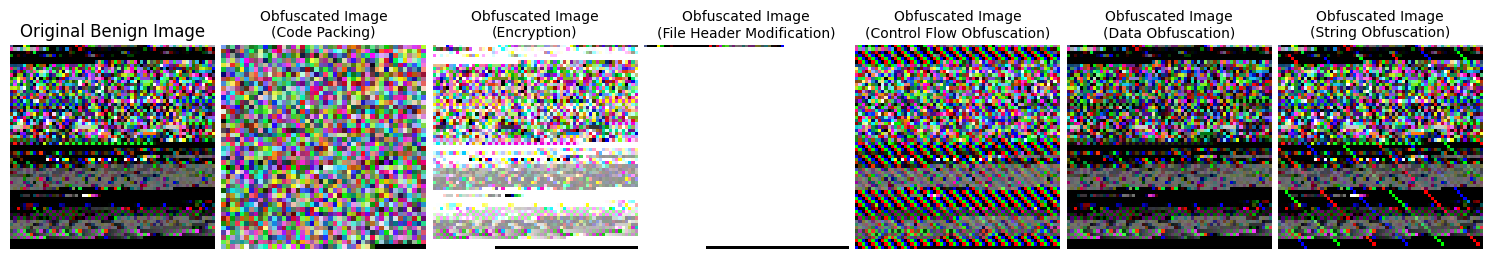

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the original benign images folder
benign_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/benign_img"

# Path to the obfuscated images folder
obfuscated_base_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images"

# List of obfuscation techniques
techniques = ["Code_Packing_images", "Encryption_images", "File_Header_Modification_images",
              "Control_Flow_Obfuscation_images", "Data_Obfuscation_images", "String_Obfuscation_images"]

# Function to plot original and obfuscated images side by side
def plot_images(benign_path, obfuscated_paths):
    # Load and plot the original benign image
    original_image = Image.open(benign_path)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(obfuscated_paths) + 1, 1)
    plt.imshow(original_image)
    plt.title("Original Benign Image")
    plt.axis('off')

    # Load and plot each obfuscated image
    for i, obfuscated_path in enumerate(obfuscated_paths, start=2):
        obfuscated_image = Image.open(obfuscated_path)
        plt.subplot(1, len(obfuscated_paths) + 1, i)
        plt.imshow(obfuscated_image)
        technique_name = techniques[i - 2].replace("_images", "").replace("_", " ")
        plt.title(f"Obfuscated Image\n({technique_name})", fontsize=10)
        plt.axis('off')

    plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=1.0)
    plt.show()

# Example usage: Plotting one sample image for demonstration
sample_image_name = "9AB7FF3C2052D011DFD1A52374568DA9.png"

#8E4B224A7C4CA1E9EAE78D60005B941D
#2DB0202A91362C987B1EF19058CB5579
#9AB7FF3C2052D011DFD1A52374568DA9

# Path to the original benign image
benign_image_path = os.path.join(benign_folder, sample_image_name)

# Paths to the corresponding obfuscated images
obfuscated_image_paths = [os.path.join(obfuscated_base_folder, technique, sample_image_name)
                          for technique in techniques]

# Plotting the images
plot_images(benign_image_path, obfuscated_image_paths)


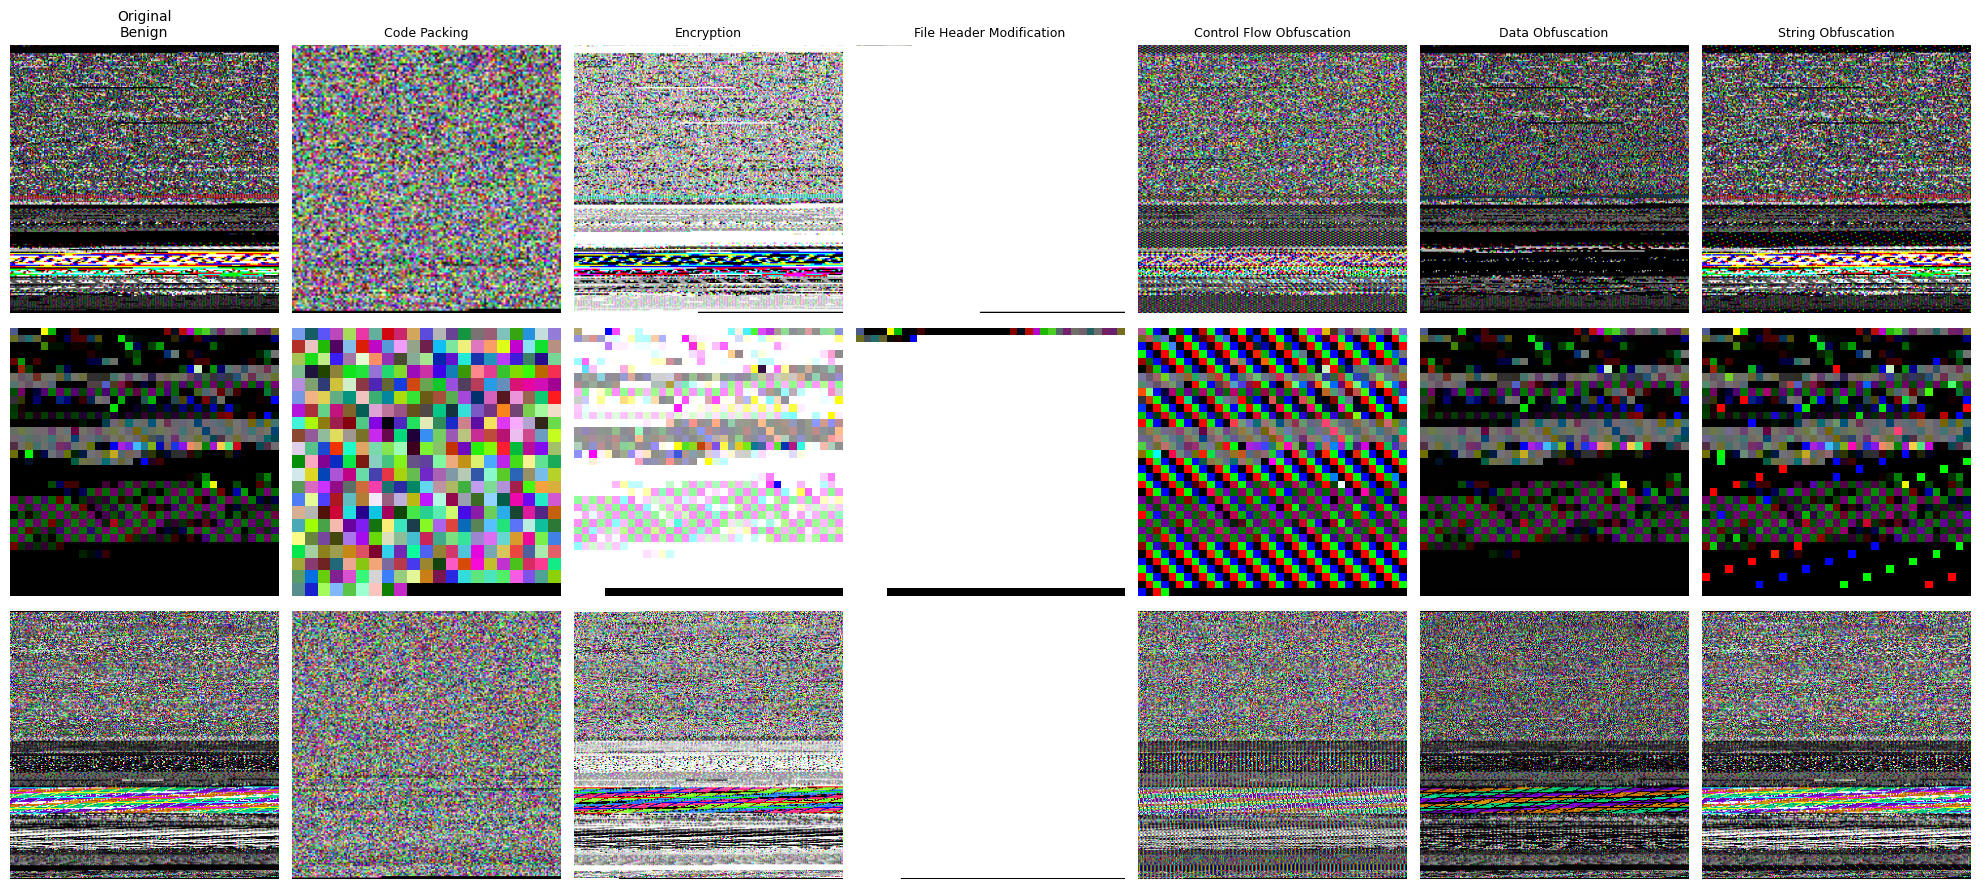

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Paths
benign_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/benign_img"
obfuscated_base_folder = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images"

# Obfuscation types
techniques = [
    "Code_Packing_images", "Encryption_images", "File_Header_Modification_images",
    "Control_Flow_Obfuscation_images", "Data_Obfuscation_images", "String_Obfuscation_images"
]

# Select 3 random benign image filenames
all_filenames = os.listdir(benign_folder)
selected_images = random.sample(all_filenames, 3)

# Set up figure
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20, 9))
fig.subplots_adjust(wspace=0.3, hspace=0.6)

for row_idx, filename in enumerate(selected_images):
    # Load original benign image
    benign_img_path = os.path.join(benign_folder, filename)
    original_img = Image.open(benign_img_path)
    axes[row_idx, 0].imshow(original_img)
    axes[row_idx, 0].axis('off')
    if row_idx == 0:
        axes[row_idx, 0].set_title("Original\nBenign", fontsize=10)

    # Load obfuscated versions
    for col_idx, technique in enumerate(techniques, start=1):
        obf_path = os.path.join(obfuscated_base_folder, technique, filename)
        try:
            obf_img = Image.open(obf_path)
            axes[row_idx, col_idx].imshow(obf_img)
            axes[row_idx, col_idx].axis('off')
            if row_idx == 0:
                title = technique.replace("_images", "").replace("_", " ")
                axes[row_idx, col_idx].set_title(f"{title}", fontsize=9)
        except Exception as e:
            axes[row_idx, col_idx].axis('off')
            axes[row_idx, col_idx].text(0.5, 0.5, "Missing", ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


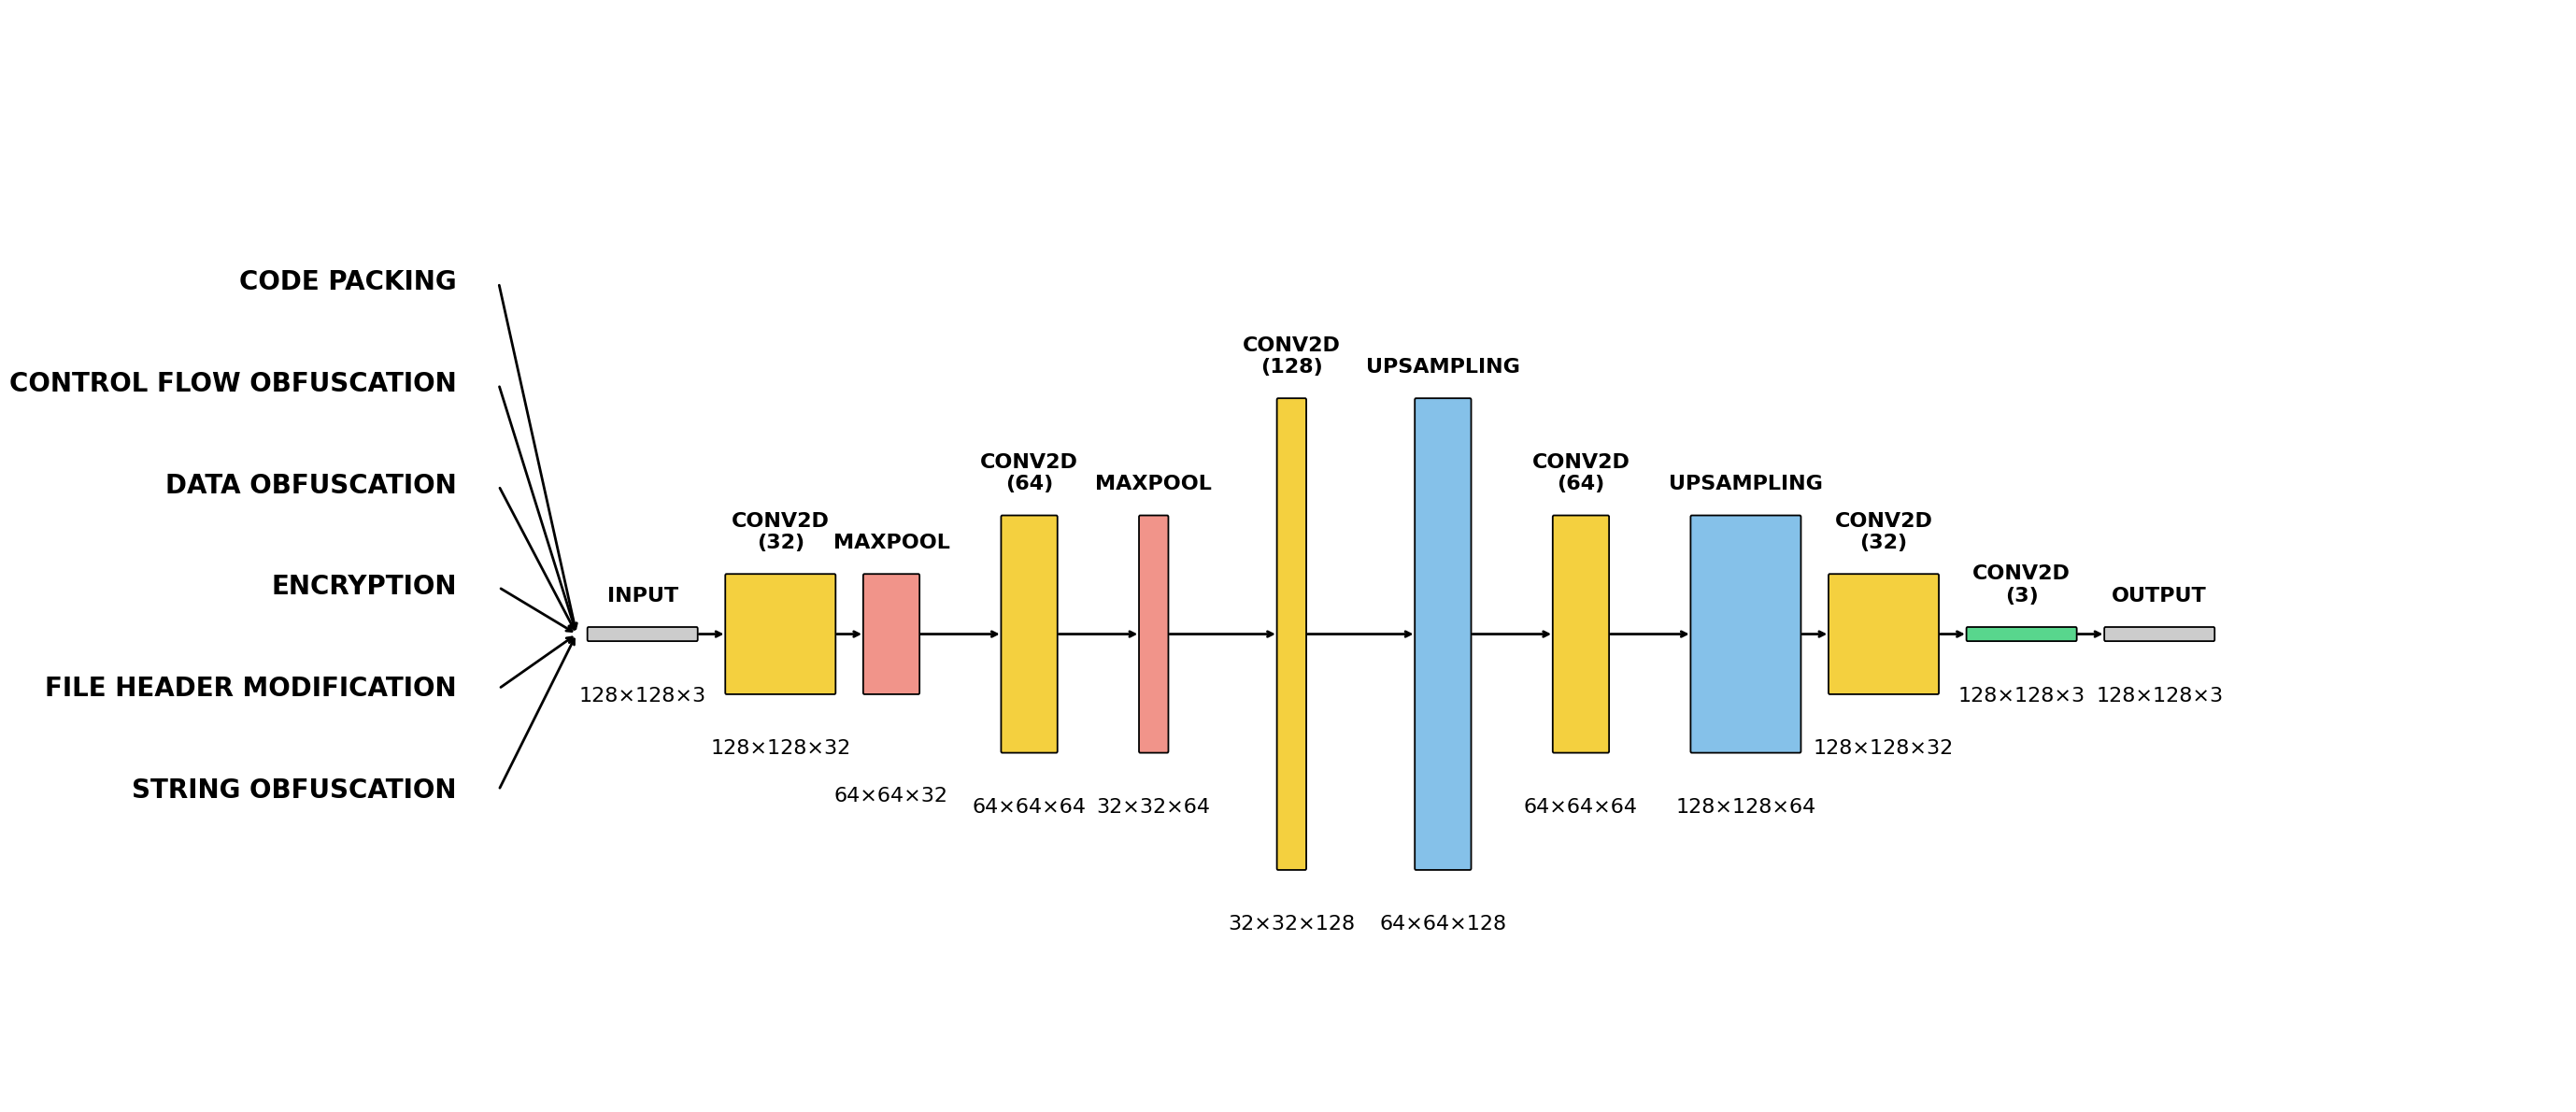

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Input techniques (converted to uppercase)
TECHNIQUES = [
    "CODE PACKING", "CONTROL FLOW OBFUSCATION", "DATA OBFUSCATION",
    "ENCRYPTION", "FILE HEADER MODIFICATION", "STRING OBFUSCATION"
]

# DAE Layers with uppercase names
layers = [
    {"name": "INPUT",           "shape": (128, 128, 3),   "color": "#cccccc"},
    {"name": "CONV2D\n(32)",    "shape": (128, 128, 32),  "color": "#f4d03f"},
    {"name": "MAXPOOL",         "shape": (64, 64, 32),    "color": "#f1948a"},
    {"name": "CONV2D\n(64)",    "shape": (64, 64, 64),    "color": "#f4d03f"},
    {"name": "MAXPOOL",         "shape": (32, 32, 64),    "color": "#f1948a"},
    {"name": "CONV2D\n(128)",   "shape": (32, 32, 128),   "color": "#f4d03f"},
    {"name": "UPSAMPLING",      "shape": (64, 64, 128),   "color": "#85c1e9"},
    {"name": "CONV2D\n(64)",    "shape": (64, 64, 64),    "color": "#f4d03f"},
    {"name": "UPSAMPLING",      "shape": (128, 128, 64),  "color": "#85c1e9"},
    {"name": "CONV2D\n(32)",    "shape": (128, 128, 32),  "color": "#f4d03f"},
    {"name": "CONV2D\n(3)",     "shape": (128, 128, 3),   "color": "#58d68d"},
    {"name": "OUTPUT",          "shape": (128, 128, 3),   "color": "#cccccc"},
]

# Normalize size
max_spatial = max(l["shape"][0] for l in layers)
max_depth = max(l["shape"][2] for l in layers)

fig, ax = plt.subplots(figsize=(28, 12))
ax.set_xlim(-6, len(layers) * 2.5 + 3)
ax.set_ylim(0, 14)
ax.axis('off')

x_positions = []

# Draw layers
for i, layer in enumerate(layers):
    x = i * 2.3
    res, _, depth = layer["shape"]
    width = (res / max_spatial) * 1.8
    height = (depth / max_depth) * 6.0
    y = 6 - height / 2

    # Draw box
    rect = patches.FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor='black',
        facecolor=layer["color"],
        linewidth=1.3
    )
    ax.add_patch(rect)

    # Layer name in UPPERCASE
    ax.text(x + width / 2, y + height + 0.3, layer["name"].upper(),
            ha="center", va="bottom", fontsize=16, fontweight='bold')

    # Shape info (keep normal case, adjust 3rd box lower)
    shape_str = f"{res}×{res}×{depth}"
    y_offset = -0.6 if i != 2 else -1.2
    ax.text(x + width / 2, y + y_offset, shape_str,
            ha="center", va="top", fontsize=16)

    x_positions.append((x, x + width, y, height))

# Add arrows between layers
for i in range(len(x_positions) - 1):
    x_end = x_positions[i][1]
    x_start_next = x_positions[i + 1][0]
    y_middle = 6
    ax.annotate(
        '', xy=(x_start_next, y_middle), xytext=(x_end, y_middle),
        arrowprops=dict(arrowstyle="->", lw=2)
    )

# Input arrows and UPPERCASE labels
for i, technique in enumerate(TECHNIQUES):
    y_input = 10.5 - i * 1.3
    ax.annotate(
        "", xy=(x_positions[0][0] - 0.2, 6), xytext=(-1.5, y_input),
        arrowprops=dict(arrowstyle="->", lw=2)
    )
    ax.text(-2.2, y_input, technique.upper(), fontsize=20, ha="right", va="center", fontweight='bold')

plt.tight_layout()
plt.show()


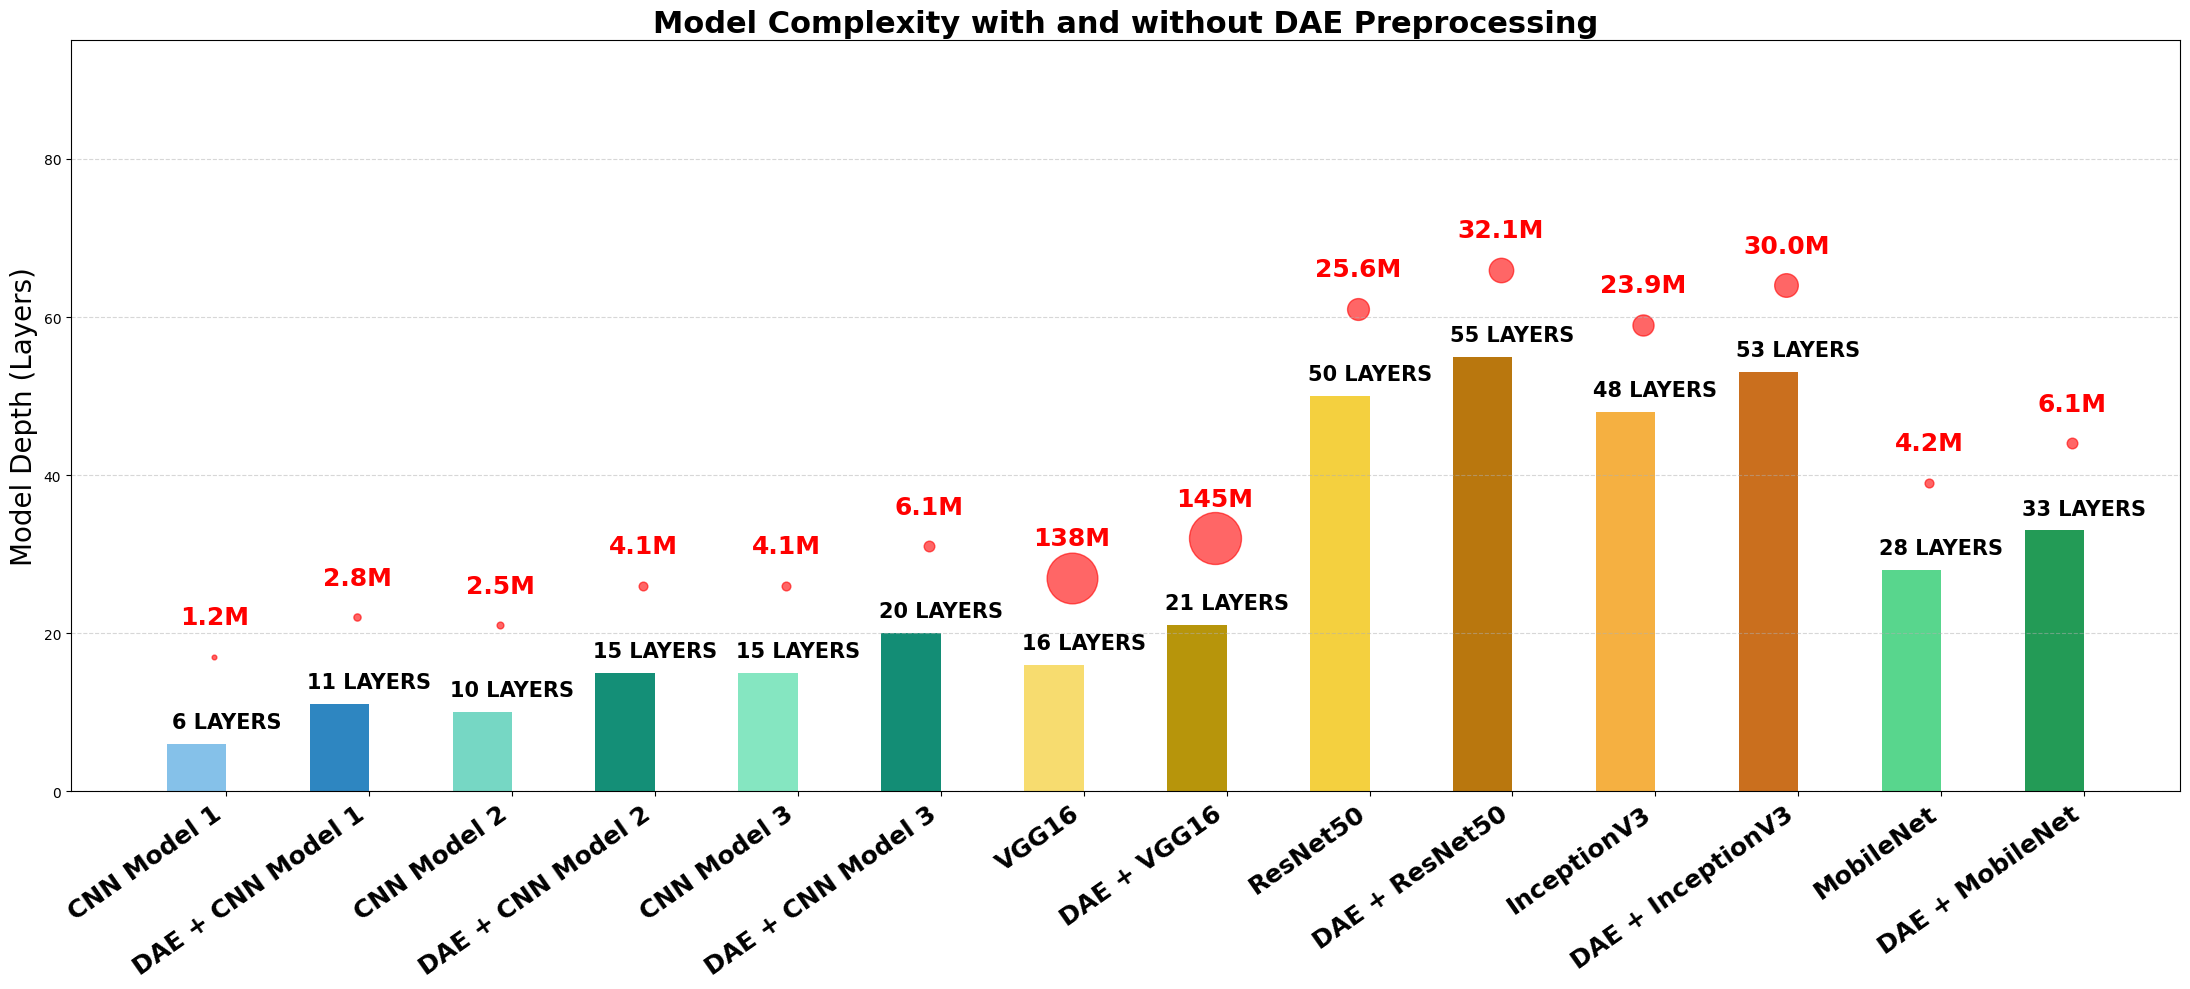

In [ ]:
import matplotlib.pyplot as plt

# Extended model list with CNN_v3 and its DAE version
models = [
    {"name": "CNN Model 1",        "depth": 6,  "params": 1.2,  "color": "#85C1E9"},
    {"name": "DAE + CNN Model 1",  "depth": 11, "params": 2.8,  "color": "#2E86C1"},
    {"name": "CNN Model 2",        "depth": 10, "params": 2.5,  "color": "#76D7C4"},
    {"name": "DAE + CNN Model 2",  "depth": 15, "params": 4.1,  "color": "#148F77"},
    {"name": "CNN Model 3",        "depth": 15, "params": 4.1,  "color": "#85E6C1"},
    {"name": "DAE + CNN Model 3",  "depth": 20, "params": 6.1,  "color": "#138D75"},
    {"name": "VGG16",              "depth": 16, "params": 138,  "color": "#F7DC6F"},
    {"name": "DAE + VGG16",        "depth": 21, "params": 145,  "color": "#B7950B"},
    {"name": "ResNet50",           "depth": 50, "params": 25.6, "color": "#F4D03F"},
    {"name": "DAE + ResNet50",     "depth": 55, "params": 32.1, "color": "#B9770E"},
    {"name": "InceptionV3",        "depth": 48, "params": 23.9, "color": "#F5B041"},
    {"name": "DAE + InceptionV3",  "depth": 53, "params": 30.0, "color": "#CA6F1E"},
    {"name": "MobileNet",          "depth": 28, "params": 4.2,  "color": "#58D68D"},
    {"name": "DAE + MobileNet",    "depth": 33, "params": 6.1,  "color": "#239B56"},
]

# Calculate maximum parameter size for bubble scaling
max_params = max(m["params"] for m in models)

# Create figure
fig, ax = plt.subplots(figsize=(22, 10))
bar_width = 0.5
x_labels = []

# Plot each model
for i, model in enumerate(models):
    x = i * 1.2
    x_labels.append(x + bar_width / 2)

    # Draw bar for model depth
    ax.bar(x, model["depth"], width=bar_width, color=model["color"])
    ax.text(x + bar_width / 2, model["depth"] + 1.5,
            f'{model["depth"]} LAYERS', ha='center', va='bottom',
            fontsize=15, fontweight='bold')

    # Red bubble for parameter size
    size = (model["params"] / max_params) * 1400  # scaled up
    bubble_x = x + bar_width / 2 - 0.1
    bubble_y = model["depth"] + 11
    ax.scatter(bubble_x, bubble_y, s=size,
               color='red', alpha=0.6, edgecolor='red')

    # Param text above bubble
    ax.text(bubble_x, bubble_y + 3.5,
            f'{model["params"]}M', ha='center', va='bottom',
            fontsize=18, rotation=0, fontweight='bold', color='red')

# Axis formatting
ax.set_xticks(x_labels)
ax.set_xticklabels([m["name"] for m in models], rotation=35,
                   ha='right', fontsize=18, fontweight='bold')
ax.set_ylabel("Model Depth (Layers)", fontsize=20)
ax.set_title("Model Complexity with and without DAE Preprocessing", fontsize=22, fontweight='bold')
ax.set_ylim(0, max(m["depth"] for m in models) + 40)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# **Part 2:** Training the DAE

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.metrics import peak_signal_noise_ratio as psnr
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define constants
IMAGE_SIZE = (128, 128)  # Reduced image size
BATCH_SIZE = 16  # Smaller batch size
EPOCHS = 20
OBSC_FOLDER_BASE = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/obfuscated_benign_images"
BENIGN_FOLDER = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/benign_img"
TECHNIQUES = ["Code_Packing_images", "Control_Flow_Obfuscation_images",
              "Data_Obfuscation_images", "Encryption_images",
              "File_Header_Modification_images", "String_Obfuscation_images"]

# Function to load and preprocess images
def load_and_preprocess(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img)
    return np.array(images)

# Load and preprocess original images
original_images = load_and_preprocess(BENIGN_FOLDER)

# Function to load obfuscated images for a specific technique
def load_obfuscated_images(technique_folder):
    obfuscated_images = []
    for filename in os.listdir(technique_folder):
        img = load_img(os.path.join(technique_folder, filename), target_size=IMAGE_SIZE)
        img = img_to_array(img) / 255.0  # Normalize pixel values
        obfuscated_images.append(img)
    return np.array(obfuscated_images)

# Build the Denoising Autoencoder model
def build_dae_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
    ])
    model.compile(optimizer='adam', loss='mse')  # Mean Squared Error for image reconstruction
    return model

# Iterate over each technique and train the DAE
for technique in TECHNIQUES:
    print(f"Training DAE for technique: {technique}")

    # Load obfuscated images for the current technique
    obfuscated_images = load_obfuscated_images(os.path.join(OBSC_FOLDER_BASE, technique))

    # Split data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(obfuscated_images, original_images, test_size=0.2, random_state=42)

    # Build and compile the model
    model = build_dae_model(input_shape=IMAGE_SIZE + (3,))

    # Adjusted filepath for ModelCheckpoint callback
    checkpoint_path = f"/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/dae_models/checkpoint_{technique}.weights.h5"
    checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, verbose=1)


    # Train the model
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

    # Evaluate the model
    loss = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {loss}")

    # Calculate PSNR and MSE
    y_pred = model.predict(X_val)
    mse = np.mean(np.square(X_val - y_pred))
    psnr_val = psnr(X_val, y_pred, data_range=1.0)

    print(f"Validation MSE: {mse}")
    print(f"Validation PSNR: {psnr_val}")

    # Save the trained model
    model_path = f"/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/dae_models/dae_model_{technique}.h5"
    model.save(model_path)

    # Clear memory
    del model, history
    tf.keras.backend.clear_session()


# **Part 3:** Models, Training/Testing

### necessary packages

In [ ]:
!pip install -q tensorflow==2.13.0

In [ ]:
!pip install tensorflow


In [ ]:
!pip uninstall -y keras tensorflow
!pip install tensorflow==2.15



## Test the Models **without DAEs** as pre-processor

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the directory containing test images
test_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images"

# Path to the directory containing the models
models_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/models/models"

# List all models in the directory
model_files = [f for f in os.listdir(models_directory) if f.endswith('.h5')]

# Create an ImageDataGenerator for data normalization
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test dataset using ImageDataGenerator
test_dataset = datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Loop through each model and evaluate on the test set
for model_file in model_files:
    # Load the model
    model_path = os.path.join(models_directory, model_file)
    model = load_model(model_path)

    # Get true labels and predictions
    y_true = test_dataset.classes
    predictions = model.predict(test_dataset)
    y_pred = (predictions > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    sensitivity = confusion_mat[1, 1] / (confusion_mat[1, 0] + confusion_mat[1, 1])
    specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])

    # Display metrics for each model
    print(f"\nMetrics for Model: {model_file}")
    print("Accuracy:", accuracy)
    print("Sensitivity (True Positive Rate):", sensitivity)
    print("Specificity (True Negative Rate):", specificity)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))


Found 6462 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  bias_initializer="zeros",
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 60s 295ms/step

Metrics for Model: model_CNN_v1.h5
Accuracy: 0.8845558650572578
Sensitivity (True Positive Rate): 0.8857938718662952
Specificity (True Negative Rate): 0.8833178582482204
Confusion Matrix:
[[2854  377]
 [ 369 2862]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3231
           1       0.88      0.89      0.88      3231

    accuracy                           0.88      6462
   macro avg       0.88      0.88      0.88      6462
weighted avg       0.88      0.88      0.88      6462



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  bias_initializer="zeros",


202/202 ━━━━━━━━━━━━━━━━━━━━ 63s 311ms/step

Metrics for Model: model_CNN_v2.h5
Accuracy: 0.8775920767564221
Sensitivity (True Positive Rate): 0.8987929433611885
Specificity (True Negative Rate): 0.8563912101516559
Confusion Matrix:
[[2767  464]
 [ 327 2904]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3231
           1       0.86      0.90      0.88      3231

    accuracy                           0.88      6462
   macro avg       0.88      0.88      0.88      6462
weighted avg       0.88      0.88      0.88      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 67s 329ms/step

Metrics for Model: model_autoencoder.h5
Accuracy: 0.8888888888888888
Sensitivity (True Positive Rate): 0.8696997833488084
Specificity (True Negative Rate): 0.9080779944289693
Confusion Matrix:
[[2934  297]
 [ 421 2810]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3231
           1       0.90      0.87      0.89      3231

    accuracy                           0.89      6462
   macro avg       0.89      0.89      0.89      6462
weighted avg       0.89      0.89      0.89      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 643s 3s/step

Metrics for Model: model_vgg16.h5
Accuracy: 0.9063757350665429
Sensitivity (True Positive Rate): 0.9681213246672856
Specificity (True Negative Rate): 0.8446301454658001
Confusion Matrix:
[[2729  502]
 [ 103 3128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3231
           1       0.86      0.97      0.91      3231

    accuracy                           0.91      6462
   macro avg       0.91      0.91      0.91      6462
weighted avg       0.91      0.91      0.91      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step

Metrics for Model: model_resnet50.h5
Accuracy: 0.8113587124729186
Sensitivity (True Positive Rate): 0.8842463633549984
Specificity (True Negative Rate): 0.7384710615908388
Confusion Matrix:
[[2386  845]
 [ 374 2857]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      3231
           1       0.77      0.88      0.82      3231

    accuracy                           0.81      6462
   macro avg       0.82      0.81      0.81      6462
weighted avg       0.82      0.81      0.81      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 152s 741ms/step

Metrics for Model: model_inceptionv3.h5
Accuracy: 0.9068399876199319
Sensitivity (True Positive Rate): 0.9761683689260291
Specificity (True Negative Rate): 0.8375116063138347
Confusion Matrix:
[[2706  525]
 [  77 3154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3231
           1       0.86      0.98      0.91      3231

    accuracy                           0.91      6462
   macro avg       0.91      0.91      0.91      6462
weighted avg       0.91      0.91      0.91      6462



TypeError: Error when deserializing class 'DepthwiseConv2D' using config={'name': 'conv_dw_1', 'trainable': False, 'dtype': 'float32', 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': False, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'bias_constraint': None, 'depth_multiplier': 1, 'depthwise_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'depthwise_regularizer': None, 'depthwise_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to DepthwiseConv2D: {'groups': 1}

## Test Models **with DAEs** as pre-processor

#### Create /Cleaned_Images/Teechnique/benign-malicious Folders

In [ ]:
import os

# Define the base directory where Cleaned_Images will be created
base_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images"

# List of DAE techniques
TECHNIQUES = [
    "Code_Packing_images",
    "Control_Flow_Obfuscation_images",
    "Data_Obfuscation_images",
    "Encryption_images",
    "File_Header_Modification_images",
    "String_Obfuscation_images"
]

# Create Cleaned_Images directory
cleaned_images_directory = os.path.join(base_directory, "Cleaned_Images")
os.makedirs(cleaned_images_directory, exist_ok=True)
print(f"Created directory: {cleaned_images_directory}")

# Create subfolders for each technique (benign and malicious)
for technique in TECHNIQUES:
    technique_directory = os.path.join(cleaned_images_directory, technique)
    os.makedirs(technique_directory, exist_ok=True)
    benign_directory = os.path.join(technique_directory, "benign")
    malicious_directory = os.path.join(technique_directory, "malicious")
    os.makedirs(benign_directory, exist_ok=True)
    os.makedirs(malicious_directory, exist_ok=True)
    print(f"Created technique directories for {technique}:")
    print(f"  Benign images directory: {benign_directory}")
    print(f"  Malicious images directory: {malicious_directory}")

print("\nFolder creation completed successfully!")





#### **Save Original Benign Images** to /Cleaned_Images/Technique_Name/benign folder

In [ ]:
import shutil

# Define the base directory where Cleaned_Images is located
base_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images"

# List of DAE techniques
TECHNIQUES = [
    "Code_Packing_images",
    "Control_Flow_Obfuscation_images",
    "Data_Obfuscation_images",
    "Encryption_images",
    "File_Header_Modification_images",
    "String_Obfuscation_images"
]

# Function to copy benign images to each technique's benign folder
def copy_benign_images(base_directory):
    # Iterate through each technique
    for technique in TECHNIQUES:
        technique_benign_directory = os.path.join(base_directory, "Cleaned_Images", technique, "benign")
        # Check if the benign directory exists
        if os.path.exists(technique_benign_directory):
            # Directory containing original benign images
            original_benign_directory = os.path.join(base_directory, "benign")
            # Iterate through each benign image in the original directory
            for filename in os.listdir(original_benign_directory):
                src = os.path.join(original_benign_directory, filename)
                dst = os.path.join(technique_benign_directory, filename)
                shutil.copyfile(src, dst)
                print(f"Copied {filename} to {technique_benign_directory}")
        else:
            print(f"Benign directory does not exist for {technique}. Skipping...")

# Call the function to copy benign images to each technique's benign folder
copy_benign_images(base_directory)

print("\nBenign images copied to all benign folders successfully!")


#### **Clean** malicious images into /Cleaned_Images/Technique_Name/malicious **using DAEs**

In [ ]:
# Suppress TensorFlow INFO and WARNING messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

# Define the base directory where Cleaned_Images is located
base_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images"

# List of DAE techniques
TECHNIQUES = [
    "Code_Packing_images",
    "Control_Flow_Obfuscation_images",
    "Data_Obfuscation_images",
    "Encryption_images",
    "File_Header_Modification_images",
    "String_Obfuscation_images"
]

# Directory containing original malicious images
original_malicious_directory = os.path.join(base_directory, "malicious")

# Directory containing DAE models
dae_models_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/TRAPMINE/dae_models"

# Function to clean images using a single DAE model
def clean_images_with_dae(dae_model_path, input_directory, output_directory):
    # Check if DAE model file exists
    if not os.path.exists(dae_model_path):
        raise FileNotFoundError(f"DAE model file '{dae_model_path}' not found.")

    # Define custom objects if necessary (replace 'mse' with your actual custom objects)
    custom_objects = {'mse': tf.keras.losses.mse}

    # Load DAE model with custom objects
    dae_model = load_model(dae_model_path, custom_objects=custom_objects)

    # Process each image in the input directory
    for filename in os.listdir(input_directory):
        img_path = os.path.join(input_directory, filename)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension
        cleaned_img_array = dae_model.predict(img_array)
        cleaned_img = tf.squeeze(cleaned_img_array, axis=0)  # Remove batch dimension

        # Save cleaned image to output directory
        output_path = os.path.join(output_directory, filename)
        save_img(output_path, cleaned_img.numpy())

        print(f"Cleaned image saved: {output_path}")

# Function to clean malicious images using each DAE model and save to respective folder
def process_dae_models(base_directory, dae_models_directory):
    # Iterate through each technique
    for technique in TECHNIQUES:
        technique_directory = os.path.join(base_directory, "Cleaned_Images", technique)

        # Load DAE model for the current technique
        dae_model_path = os.path.join(dae_models_directory, f"dae_model_{technique}.h5")

        # Clean malicious images using the DAE model
        try:
            clean_images_with_dae(dae_model_path, original_malicious_directory, technique_directory)
        except FileNotFoundError as e:
            print(f"Error processing {technique}: {e}")

# Call the function to process DAE models and clean malicious images
process_dae_models(base_directory, dae_models_directory)

print("\nMalicious images cleaned and saved successfully!")


#### print out how many images we have

In [ ]:
import os


# Define the base directory where Cleaned_Images is located
base_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images"

# List of DAE techniques
TECHNIQUES = [
    "Code_Packing_images",
    "Control_Flow_Obfuscation_images",
    "Data_Obfuscation_images",
    "Encryption_images",
    "File_Header_Modification_images",
    "String_Obfuscation_images"
]


# Function to count malicious images in each technique folder
def count_malicious_images(base_directory):
    # Iterate through each technique
    for technique in TECHNIQUES:
        technique_directory = os.path.join(base_directory, "Cleaned_Images", technique, "benign")

        # Count number of files in the directory
        num_files = len(os.listdir(technique_directory))

        print(f"Technique: {technique}, Benign Images Count: {num_files}")

# Call the function to count malicious images in each technique folder
count_malicious_images(base_directory)



# Function to count malicious images in each technique folder
def count_malicious_images(base_directory):
    # Iterate through each technique
    for technique in TECHNIQUES:
        technique_directory = os.path.join(base_directory, "Cleaned_Images", technique, "malicious")

        # Count number of files in the directory
        num_files = len(os.listdir(technique_directory))

        print(f"\nTechnique: {technique}, Malicious Images Count: {num_files}")

# Call the function to count malicious images in each technique folder
count_malicious_images(base_directory)


Technique: Code_Packing_images, Benign Images Count: 3231
Technique: Control_Flow_Obfuscation_images, Benign Images Count: 3231
Technique: Data_Obfuscation_images, Benign Images Count: 3231
Technique: Encryption_images, Benign Images Count: 3231
Technique: File_Header_Modification_images, Benign Images Count: 3231
Technique: String_Obfuscation_images, Benign Images Count: 3231

Technique: Code_Packing_images, Malicious Images Count: 3231

Technique: Control_Flow_Obfuscation_images, Malicious Images Count: 3231

Technique: Data_Obfuscation_images, Malicious Images Count: 3231

Technique: Encryption_images, Malicious Images Count: 3231

Technique: File_Header_Modification_images, Malicious Images Count: 3231

Technique: String_Obfuscation_images, Malicious Images Count: 3231


### Show metrics on DAEs images

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the directory containing test images
test_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images/Cleaned_Images/Code_Packing_images"

# Path to the directory containing the models
models_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/models/models"

# List all models in the directory
model_files = [f for f in os.listdir(models_directory) if f.endswith('.h5')]

# Create an ImageDataGenerator for data normalization
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test dataset using ImageDataGenerator
test_dataset = datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Loop through each model and evaluate on the test set
for model_file in model_files:
    # Load the model
    model_path = os.path.join(models_directory, model_file)
    model = load_model(model_path)

    # Get true labels and predictions
    y_true = test_dataset.classes
    predictions = model.predict(test_dataset)
    y_pred = (predictions > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    sensitivity = confusion_mat[1, 1] / (confusion_mat[1, 0] + confusion_mat[1, 1])
    specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])

    # Display metrics for each model
    print(f"\nMetrics for Model: {model_file}")
    print("Accuracy:", accuracy)
    print("Sensitivity (True Positive Rate):", sensitivity)
    print("Specificity (True Negative Rate):", specificity)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))


Found 6462 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 772s 4s/step

Metrics for Model: model_CNN_v1.h5
Accuracy: 0.5419374806561436
Sensitivity (True Positive Rate): 0.20055710306406685
Specificity (True Negative Rate): 0.8833178582482204
Confusion Matrix:
[[2854  377]
 [2583  648]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.88      0.66      3231
           1       0.63      0.20      0.30      3231

    accuracy                           0.54      6462
   macro avg       0.58      0.54      0.48      6462
weighted avg       0.58      0.54      0.48      6462



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 73s 362ms/step

Metrics for Model: model_CNN_v2.h5
Accuracy: 0.9281956050758279
Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.8563912101516559
Confusion Matrix:
[[2767  464]
 [   0 3231]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3231
           1       0.87      1.00      0.93      3231

    accuracy                           0.93      6462
   macro avg       0.94      0.93      0.93      6462
weighted avg       0.94      0.93      0.93      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 908s 4s/step

Metrics for Model: model_vgg16.h5
Accuracy: 0.9142680284741566
Sensitivity (True Positive Rate): 0.9839059114825132
Specificity (True Negative Rate): 0.8446301454658001
Confusion Matrix:
[[2729  502]
 [  52 3179]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      3231
           1       0.86      0.98      0.92      3231

    accuracy                           0.91      6462
   macro avg       0.92      0.91      0.91      6462
weighted avg       0.92      0.91      0.91      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step

Metrics for Model: model_resnet50.h5
Accuracy: 0.7533271432992882
Sensitivity (True Positive Rate): 0.7681832250077375
Specificity (True Negative Rate): 0.7384710615908388
Confusion Matrix:
[[2386  845]
 [ 749 2482]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3231
           1       0.75      0.77      0.76      3231

    accuracy                           0.75      6462
   macro avg       0.75      0.75      0.75      6462
weighted avg       0.75      0.75      0.75      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 202s 987ms/step

Metrics for Model: model_inceptionv3.h5
Accuracy: 0.5925410089755494
Sensitivity (True Positive Rate): 0.347570411637264
Specificity (True Negative Rate): 0.8375116063138347
Confusion Matrix:
[[2706  525]
 [2108 1123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67      3231
           1       0.68      0.35      0.46      3231

    accuracy                           0.59      6462
   macro avg       0.62      0.59      0.57      6462
weighted avg       0.62      0.59      0.57      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 91s 446ms/step

Metrics for Model: model_CNN_v3.h5
Accuracy: 0.9165892912411018
Sensitivity (True Positive Rate): 0.9251005880532343
Specificity (True Negative Rate): 0.9080779944289693
Confusion Matrix:
[[2934  297]
 [ 242 2989]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3231
           1       0.91      0.93      0.92      3231

    accuracy                           0.92      6462
   macro avg       0.92      0.92      0.92      6462
weighted avg       0.92      0.92      0.92      6462



In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the directory containing test images
test_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images/Cleaned_Images/Control_Flow_Obfuscation_images"

# Path to the directory containing the models
models_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/models/models"

# List all models in the directory
model_files = [f for f in os.listdir(models_directory) if f.endswith('.h5')]

# Create an ImageDataGenerator for data normalization
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test dataset using ImageDataGenerator
test_dataset = datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Loop through each model and evaluate on the test set
for model_file in model_files:
    # Load the model
    model_path = os.path.join(models_directory, model_file)
    model = load_model(model_path)

    # Get true labels and predictions
    y_true = test_dataset.classes
    predictions = model.predict(test_dataset)
    y_pred = (predictions > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    sensitivity = confusion_mat[1, 1] / (confusion_mat[1, 0] + confusion_mat[1, 1])
    specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])

    # Display metrics for each model
    print(f"\nMetrics for Model: {model_file}")
    print("Accuracy:", accuracy)
    print("Sensitivity (True Positive Rate):", sensitivity)
    print("Specificity (True Negative Rate):", specificity)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))



Found 6462 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 785s 4s/step

Metrics for Model: model_CNN_v1.h5
Accuracy: 0.4596100278551532
Sensitivity (True Positive Rate): 0.03590219746208604
Specificity (True Negative Rate): 0.8833178582482204
Confusion Matrix:
[[2854  377]
 [3115  116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.88      0.62      3231
           1       0.24      0.04      0.06      3231

    accuracy                           0.46      6462
   macro avg       0.36      0.46      0.34      6462
weighted avg       0.36      0.46      0.34      6462



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 73s 361ms/step

Metrics for Model: model_CNN_v2.h5
Accuracy: 0.9281956050758279
Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.8563912101516559
Confusion Matrix:
[[2767  464]
 [   0 3231]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3231
           1       0.87      1.00      0.93      3231

    accuracy                           0.93      6462
   macro avg       0.94      0.93      0.93      6462
weighted avg       0.94      0.93      0.93      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 905s 4s/step

Metrics for Model: model_vgg16.h5
Accuracy: 0.9186010523057877
Sensitivity (True Positive Rate): 0.9925719591457753
Specificity (True Negative Rate): 0.8446301454658001
Confusion Matrix:
[[2729  502]
 [  24 3207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      3231
           1       0.86      0.99      0.92      3231

    accuracy                           0.92      6462
   macro avg       0.93      0.92      0.92      6462
weighted avg       0.93      0.92      0.92      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step

Metrics for Model: model_resnet50.h5
Accuracy: 0.8291550603528319
Sensitivity (True Positive Rate): 0.9198390591148251
Specificity (True Negative Rate): 0.7384710615908388
Confusion Matrix:
[[2386  845]
 [ 259 2972]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      3231
           1       0.78      0.92      0.84      3231

    accuracy                           0.83      6462
   macro avg       0.84      0.83      0.83      6462
weighted avg       0.84      0.83      0.83      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step

Metrics for Model: model_inceptionv3.h5
Accuracy: 0.592695759826679
Sensitivity (True Positive Rate): 0.3478799133395234
Specificity (True Negative Rate): 0.8375116063138347
Confusion Matrix:
[[2706  525]
 [2107 1124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67      3231
           1       0.68      0.35      0.46      3231

    accuracy                           0.59      6462
   macro avg       0.62      0.59      0.57      6462
weighted avg       0.62      0.59      0.57      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 92s 453ms/step

Metrics for Model: model_CNN_v3.h5
Accuracy: 0.8587124729186011
Sensitivity (True Positive Rate): 0.8093469514082328
Specificity (True Negative Rate): 0.9080779944289693
Confusion Matrix:
[[2934  297]
 [ 616 2615]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3231
           1       0.90      0.81      0.85      3231

    accuracy                           0.86      6462
   macro avg       0.86      0.86      0.86      6462
weighted avg       0.86      0.86      0.86      6462



In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Path to the directory containing test images
test_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/DATASETS/Test_Left_Images/Cleaned_Images/Data_Obfuscation_images"

# Path to the directory containing the models
models_directory = "/content/drive/MyDrive/Drive_Mesut/Drive_IEEE/PAPER/1. ULUSLARARASI_MAKALE/4_ML for MALWARE/models/models"

# List all models in the directory
model_files = [f for f in os.listdir(models_directory) if f.endswith('.h5')]

# Create an ImageDataGenerator for data normalization
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test dataset using ImageDataGenerator
test_dataset = datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Loop through each model and evaluate on the test set
for model_file in model_files:
    # Load the model
    model_path = os.path.join(models_directory, model_file)
    model = load_model(model_path)

    # Get true labels and predictions
    y_true = test_dataset.classes
    predictions = model.predict(test_dataset)
    y_pred = (predictions > 0.5).astype(int).flatten()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    sensitivity = confusion_mat[1, 1] / (confusion_mat[1, 0] + confusion_mat[1, 1])
    specificity = confusion_mat[0, 0] / (confusion_mat[0, 0] + confusion_mat[0, 1])

    # Display metrics for each model
    print(f"\nMetrics for Model: {model_file}")
    print("Accuracy:", accuracy)
    print("Sensitivity (True Positive Rate):", sensitivity)
    print("Specificity (True Negative Rate):", specificity)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))



Found 6462 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 781s 4s/step

Metrics for Model: model_CNN_v1.h5
Accuracy: 0.4545032497678737
Sensitivity (True Positive Rate): 0.02568864128752708
Specificity (True Negative Rate): 0.8833178582482204
Confusion Matrix:
[[2854  377]
 [3148   83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.88      0.62      3231
           1       0.18      0.03      0.04      3231

    accuracy                           0.45      6462
   macro avg       0.33      0.45      0.33      6462
weighted avg       0.33      0.45      0.33      6462



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 78s 385ms/step

Metrics for Model: model_CNN_v2.h5
Accuracy: 0.9281956050758279
Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.8563912101516559
Confusion Matrix:
[[2767  464]
 [   0 3231]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3231
           1       0.87      1.00      0.93      3231

    accuracy                           0.93      6462
   macro avg       0.94      0.93      0.93      6462
weighted avg       0.94      0.93      0.93      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 917s 5s/step

Metrics for Model: model_vgg16.h5
Accuracy: 0.9223150727329
Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.8446301454658001
Confusion Matrix:
[[2729  502]
 [   0 3231]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.92      3231
           1       0.87      1.00      0.93      3231

    accuracy                           0.92      6462
   macro avg       0.93      0.92      0.92      6462
weighted avg       0.93      0.92      0.92      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step

Metrics for Model: model_resnet50.h5
Accuracy: 0.8670690188796039
Sensitivity (True Positive Rate): 0.995666976168369
Specificity (True Negative Rate): 0.7384710615908388
Confusion Matrix:
[[2386  845]
 [  14 3217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      3231
           1       0.79      1.00      0.88      3231

    accuracy                           0.87      6462
   macro avg       0.89      0.87      0.86      6462
weighted avg       0.89      0.87      0.86      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 205s 999ms/step

Metrics for Model: model_inceptionv3.h5
Accuracy: 0.6262766945218199
Sensitivity (True Positive Rate): 0.415041782729805
Specificity (True Negative Rate): 0.8375116063138347
Confusion Matrix:
[[2706  525]
 [1890 1341]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69      3231
           1       0.72      0.42      0.53      3231

    accuracy                           0.63      6462
   macro avg       0.65      0.63      0.61      6462
weighted avg       0.65      0.63      0.61      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 91s 450ms/step

Metrics for Model: model_CNN_v3.h5
Accuracy: 0.9518724852986692
Sensitivity (True Positive Rate): 0.995666976168369
Specificity (True Negative Rate): 0.9080779944289693
Confusion Matrix:
[[2934  297]
 [  14 3217]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3231
           1       0.92      1.00      0.95      3231

    accuracy                           0.95      6462
   macro avg       0.96      0.95      0.95      6462
weighted avg       0.96      0.95      0.95      6462



Found 6462 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


202/202 ━━━━━━━━━━━━━━━━━━━━ 890s 4s/step

Metrics for Model: model_CNN_v1.h5
Accuracy: 0.44908696997833486
Sensitivity (True Positive Rate): 0.014856081708449397
Specificity (True Negative Rate): 0.8833178582482204
Confusion Matrix:
[[2854  377]
 [3183   48]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.88      0.62      3231
           1       0.11      0.01      0.03      3231

    accuracy                           0.45      6462
   macro avg       0.29      0.45      0.32      6462
weighted avg       0.29      0.45      0.32      6462



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 79s 390ms/step

Metrics for Model: model_CNN_v2.h5
Accuracy: 0.9281956050758279
Sensitivity (True Positive Rate): 1.0
Specificity (True Negative Rate): 0.8563912101516559
Confusion Matrix:
[[2767  464]
 [   0 3231]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3231
           1       0.87      1.00      0.93      3231

    accuracy                           0.93      6462
   macro avg       0.94      0.93      0.93      6462
weighted avg       0.94      0.93      0.93      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 951s 5s/step

Metrics for Model: model_vgg16.h5
Accuracy: 0.8874961312287217
Sensitivity (True Positive Rate): 0.9303621169916435
Specificity (True Negative Rate): 0.8446301454658001
Confusion Matrix:
[[2729  502]
 [ 225 3006]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      3231
           1       0.86      0.93      0.89      3231

    accuracy                           0.89      6462
   macro avg       0.89      0.89      0.89      6462
weighted avg       0.89      0.89      0.89      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step

Metrics for Model: model_resnet50.h5
Accuracy: 0.8480346641906531
Sensitivity (True Positive Rate): 0.9575982667904673
Specificity (True Negative Rate): 0.7384710615908388
Confusion Matrix:
[[2386  845]
 [ 137 3094]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      3231
           1       0.79      0.96      0.86      3231

    accuracy                           0.85      6462
   macro avg       0.87      0.85      0.85      6462
weighted avg       0.87      0.85      0.85      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step

Metrics for Model: model_inceptionv3.h5
Accuracy: 0.59223150727329
Sensitivity (True Positive Rate): 0.3469514082327453
Specificity (True Negative Rate): 0.8375116063138347
Confusion Matrix:
[[2706  525]
 [2110 1121]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67      3231
           1       0.68      0.35      0.46      3231

    accuracy                           0.59      6462
   macro avg       0.62      0.59      0.57      6462
weighted avg       0.62      0.59      0.57      6462



202/202 ━━━━━━━━━━━━━━━━━━━━ 97s 477ms/step

Metrics for Model: model_CNN_v3.h5
Accuracy: 0.5719591457753017
Sensitivity (True Positive Rate): 0.23584029712163418
Specificity (True Negative Rate): 0.9080779944289693
Confusion Matrix:
[[2934  297]
 [2469  762]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.91      0.68      3231
           1       0.72      0.24      0.36      3231

    accuracy                           0.57      6462
   macro avg       0.63      0.57      0.52      6462
weighted avg       0.63      0.57      0.52      6462

